<a href="https://colab.research.google.com/github/Wander03/final-project-Wander03/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [16]:
df_essay1 = pd.read_csv("https://www.dropbox.com/s/ofdr4nnxzt3fdw3/Essay1?dl=1")
df_essay3 = pd.read_csv("https://www.dropbox.com/s/165nlutpzpsnqqj/Essay3?dl=1")
df_essay4 = pd.read_csv("https://www.dropbox.com/s/qwqbtypu3fpxhdr/Essay4?dl=1")
df_essay5 = pd.read_csv("https://www.dropbox.com/s/tc6fnp9nqw0srp3/Essay5?dl=1")
df_essay6 = pd.read_csv("https://www.dropbox.com/s/1m6g91hf2r9yfcf/Essay6?dl=1")
df_essay7 = pd.read_csv("https://www.dropbox.com/s/2rje35hv0vyf8kh/Essay7?dl=1")
df_essay8 = pd.read_csv("https://www.dropbox.com/s/vt6cr45qclkyfdt/Essay8?dl=1")

df_test_essays = pd.read_csv("https://www.dropbox.com/s/yr8u8t1r2ntkd2o/test_set.tsv?dl=1", sep="\t", encoding='latin_1')
df_test_essays["pct"] = pd.Series()
df_test_essays["domain1_score"] = pd.Series()
df_test_essays = df_test_essays.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


In [17]:
df_essay1_pol = pd.read_csv("https://www.dropbox.com/s/jj74qpet3i0ts8o/essay1_polarities?dl=1")
df_sentences1 = pd.read_csv("https://www.dropbox.com/s/7ah1tv7xzsrne3v/essay1_polarities_sentences?dl=1")
df_essay3_pol = pd.read_csv("https://www.dropbox.com/s/nvz01h92q809ws4/essay3_polarities?dl=1")
df_sentences3 = pd.read_csv("https://www.dropbox.com/s/rv71ij43xkcf7yi/essay3_polarities_sentences?dl=1")
df_essay4_pol = pd.read_csv("https://www.dropbox.com/s/kvin3ughndsls7y/essay4_polarities?dl=1")
df_sentences4 = pd.read_csv("https://www.dropbox.com/s/5bgwryknwni1478/essay4_polarities_sentences?dl=1")
df_essay5_pol = pd.read_csv("https://www.dropbox.com/s/6io0b6vutf6ifkh/essay5_polarities?dl=1")
df_sentences5 = pd.read_csv("https://www.dropbox.com/s/ow7f2l4h0j7ahxt/essay5_polarities_sentences?dl=1")
df_essay6_pol = pd.read_csv("https://www.dropbox.com/s/lebmv8p541t7rvk/essay6_polarities?dl=1")
df_sentences6 = pd.read_csv("https://www.dropbox.com/s/8mksv1jwrhm9pfl/essay6_polarities_sentences?dl=1")
df_essay7_pol = pd.read_csv("https://www.dropbox.com/s/jci22czi6lluhty/essay7_polarities?dl=1")
df_sentences7 = pd.read_csv("https://www.dropbox.com/s/kzpfrwfpue64zne/essay7_polarities_sentences?dl=1")
df_essay8_pol = pd.read_csv("https://www.dropbox.com/s/h5zi92t8hpm96ze/essay8_polarities?dl=1")
df_sentences8 = pd.read_csv("https://www.dropbox.com/s/tkppi6twzjv4cmj/essay8_polarities_sentences?dl=1")

df_test_essays_pol = pd.read_csv("https://www.dropbox.com/s/01ue5y4v6hex5cm/test_essays_polarities?dl=1")
df_sentencestest = pd.read_csv("https://www.dropbox.com/s/tqth1yq1zi7gqw5/test_essays_polarities_sentences?dl=1")

In [18]:
def merge_df(df_lst, df_pol_lst, set_lst):
  results = []
  for index, (df, pol) in enumerate(zip(df_lst, df_pol_lst)):
    df["essay_set"] = set_lst[index] 
    for i in range(len(df)):
      df["Unnamed: 0"][i] = i
    results.append(df.merge(pol, on=["Unnamed: 0"], how="outer"))
  return results

In [19]:
df_lst = [df_essay1, df_essay3, df_essay4, df_essay5, df_essay6, df_essay7, df_essay8]
df_pol_lst = [df_essay1_pol, df_essay3_pol, df_essay4_pol, df_essay5_pol, df_essay6_pol, df_essay7_pol, df_essay8_pol]
set_lst = [1, 3, 4, 5, 6, 7, 8]

merged_lst = merge_df(df_lst, df_pol_lst, set_lst)
essay1 = merged_lst[0]
essay3 = merged_lst[1]
essay4 = merged_lst[2]
essay5 = merged_lst[3]
essay6 = merged_lst[4]
essay7 = merged_lst[5]
essay8 = merged_lst[6]

df_essay_all = pd.concat([essay1, essay3, essay4, essay5, essay6, essay7, essay8])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_test_essays["Unnamed: 0"] = pd.Series()
for i in range(len(df_test_essays)):
  df_test_essays["Unnamed: 0"][i] =  i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_test_essays = df_test_essays.merge(df_test_essays_pol, on=["Unnamed: 0"], how="outer")

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

**Similar Words**

In [22]:
df_test_essays.head(1)

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid,pct,domain1_score,Unnamed: 0,sentences,result.polarity,result.type
0,2383,1,I believe that computers have a positive effec...,2383,0.0,0.0,0.0,0.0,[{'sentence': 'I believe that computers have a...,0.12,positive


In [23]:
df_essay_all.head(1)

,Unnamed: 0,essay_id,essay,rater1_domain1,rater2_domain1,domain1_score,avg_score,pct,essay_set,sentences,result.polarity,result.type
0,0,1,"Dear local newspaper, I think effects computer...",4,4,8,4.0,0.666667,1,"[{'sentence': 'Dear local newspaper, I think e...",0.2,positive


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

Per Set


In [24]:
# Get tf_sparse for each set (to predict score)
def get_tf(df_lst, set_lst):
  results = []
  essays_w_test = []

  for index, df in enumerate(df_lst):
    essays = pd.concat([df["essay"], df_test_essays["essay"][df_test_essays["essay_set"] == set_lst[index]]])

    vec = TfidfVectorizer(norm=None) # Do not normalize.
    vec.fit(essays) # This determines the vocabulary.
    tf_idf_sparse = vec.transform(essays)

    results.append(tf_idf_sparse)

    essay_test = pd.concat([df, df_test_essays[df_test_essays["essay_set"] == set_lst[index]]])
    essay_test.drop(["sentences", "domain1_predictionid", "domain2_predictionid"], axis=1, inplace=True)
    essays_w_test.append(essay_test)

  return results, essays_w_test

In [25]:
df_lst = [essay1, essay3, essay4, essay5, essay6, essay7, essay8]
set_lst = [1, 3, 4, 5, 6, 7, 8]
tf_sparse_lst, essays_test_lst = get_tf(df_lst, set_lst)

Find Best k **WARNING TAKES 15 MINS TO RUN**

999     2.704680
998     2.705981
997     2.707173
996     2.708284
995     2.709377
         ...    
5      13.597906
4      13.625953
3      13.680664
2      13.957329
1      14.853236
Length: 999, dtype: float64

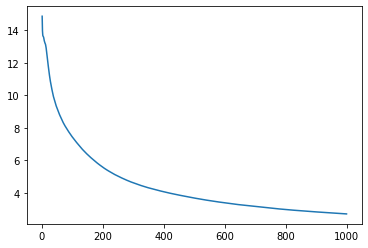

In [26]:
orig_lst = [df_essay1, df_essay3, df_essay4, df_essay5, df_essay6, df_essay7, df_essay8]
# calculate estimate of test error for a value of k
def get_cv_error(k):
  X = tf_sparse_lst[0][:len(orig_lst[0])]
  y = essays_test_lst[0][:len(orig_lst[0])]["domain1_score"]
  
  # define pipeline
  pipeline = make_pipeline(
      KNeighborsRegressor(n_neighbors=k)
  ) 
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=X, y=y,
                             scoring="neg_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()
    
ks = pd.Series(range(1, 1000))
ks.index = range(1, 1000)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

K Nearest Neighbors

In [27]:
# Using K-Nearest with consine
def pred_score(df_lst, sparse_lst, orig_lst):

  for df, sparse, orig in zip(df_lst, sparse_lst, orig_lst):
    # Create 10 Nearest Neighbors Model
    X = sparse[:len(orig)]
    y = df[:len(orig)]["domain1_score"]

    # Fit Model
    pipeline = make_pipeline(
        KNeighborsRegressor(n_neighbors=10, metric="cosine")
    )

    pipeline.fit(X, y)

    # Create Predictions
    df["prediction_sparse"] = pipeline.predict(sparse)
    df["diff_sparse"] = df["prediction_sparse"] - df["domain1_score"]

In [28]:
orig_lst = [df_essay1, df_essay3, df_essay4, df_essay5, df_essay6, df_essay7, df_essay8]

pred_score(essays_test_lst, tf_sparse_lst, orig_lst)

In [29]:
essays_test_lst[0].head(3)

,Unnamed: 0,essay_id,essay,rater1_domain1,rater2_domain1,domain1_score,avg_score,pct,essay_set,result.polarity,result.type,prediction_sparse,diff_sparse
0,0.0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,4.0,0.666667,1,0.20,positive,8.8,0.8
1,1.0,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,4.5,0.750000,1,0.17,positive,9.7,0.7
2,2.0,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,3.5,0.583333,1,0.31,positive,8.4,1.4


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

All at once


In [30]:
df_essay_all = pd.concat([df_essay_all, df_test_essays])
df_essay_all.drop(["sentences", "domain1_predictionid", "domain2_predictionid"], axis=1, inplace=True)

# get tf_sparse for all essays (to predict pct)
essays = df_essay_all["essay"]

vec = CountVectorizer()
vec.fit(essays) # This determines the vocabulary.   # USE SERIES
tf_sparse = vec.transform(essays)

In [31]:
X = tf_sparse[:11176]
y = df_essay_all[:11176]["pct"]

# Fit Model
pipeline = make_pipeline(
    KNeighborsRegressor(n_neighbors=10, metric="cosine")
)

pipeline.fit(X, y)

# Create Predictions
df_essay_all["prediction_sparse"] = pipeline.predict(tf_sparse)
df_essay_all["diff_sparse"] = df_essay_all["prediction_sparse"] - df_essay_all["pct"]

In [32]:
df_essay_all.head(3)

,Unnamed: 0,essay_id,essay,rater1_domain1,rater2_domain1,domain1_score,avg_score,pct,essay_set,result.polarity,result.type,prediction_sparse,diff_sparse
0,0.0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,4.0,0.666667,1,0.20,positive,0.783333,0.116667
1,1.0,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,4.5,0.750000,1,0.17,positive,0.783333,0.033333
2,2.0,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,3.5,0.583333,1,0.31,positive,0.833333,0.250000


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

Polarity

Per set

29    2.315651
28    2.321647
27    2.327413
26    2.328075
25    2.333885
23    2.337054
22    2.341493
24    2.342569
21    2.350948
15    2.361561
19    2.365641
20    2.368703
17    2.372162
16    2.373552
18    2.373848
14    2.374719
13    2.385343
12    2.416298
11    2.437019
10    2.455914
9     2.479934
8     2.514888
7     2.587069
6     2.690163
5     2.804005
4     2.863669
3     3.142877
2     3.765569
1     4.950907
dtype: float64

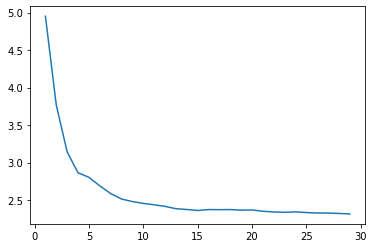

In [33]:
orig_lst = [df_essay1, df_essay3, df_essay4, df_essay5, df_essay6, df_essay7, df_essay8]
# calculate estimate of test error for a value of k
def get_cv_error(k):
  X = essays_test_lst[0][:len(orig_lst[0])][["result.polarity", "result.type"]]
  y = essays_test_lst[0][:len(orig_lst[0])]["domain1_score"]
  
  # define pipeline
  ct = make_column_transformer(
      (OneHotEncoder(), ["result.type"]),
      remainder="passthrough",
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=k)
  ) 
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=X, y=y,
                             scoring="neg_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()
    
ks = pd.Series(range(1, 30))
ks.index = range(1, 30)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

In [34]:
# Using K-Nearest with consine
def pred_score_pol(df_lst, orig_lst):

  for df, orig in zip(df_lst, orig_lst):

    # Create 10 Nearest Neighbors Model
    X = df[:len(orig)][["result.polarity", "result.type"]]
    y = df[:len(orig)][["domain1_score"]]

    # Turn Categorical Variable into Quantatative
    ct = make_column_transformer(
        (OneHotEncoder(), ["result.type"]),
        remainder="passthrough",
    )

    # define pipeline
    pipeline_k = make_pipeline(
        ct,
        StandardScaler(),
        KNeighborsRegressor(n_neighbors=5)
    ) 

    # GridSearchCV will replace n_neighbors by values in param_grid.
    grid_search = GridSearchCV(pipeline_k,
                              param_grid={"kneighborsregressor__n_neighbors": range(1, 150)}, # Yes I made sure this works for all the sets
                              scoring="neg_mean_squared_error",
                              cv=10)
    grid_search.fit(X, y)
    k = grid_search.best_params_["kneighborsregressor__n_neighbors"]
    print(k)

    # Fit Model
    pipeline = make_pipeline(
        ct,
        StandardScaler(),
        KNeighborsRegressor(n_neighbors=k)
    )

    pipeline.fit(X, y)

    # Create Predictions
    df["prediction_polarity"] = pipeline.predict(df)
    df["diff_polarity"] = df["prediction_polarity"] - df["domain1_score"]

In [35]:
pred_score_pol(essays_test_lst, orig_lst)

87
70
82
44
131
104
88


In [36]:
essays_test_lst[0].head(3)

,Unnamed: 0,essay_id,essay,rater1_domain1,rater2_domain1,domain1_score,avg_score,pct,essay_set,result.polarity,result.type,prediction_sparse,diff_sparse,prediction_polarity,diff_polarity
0,0.0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,4.0,0.666667,1,0.20,positive,8.8,0.8,8.367816,0.367816
1,1.0,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,4.5,0.750000,1,0.17,positive,9.7,0.7,8.540230,-0.459770
2,2.0,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,3.5,0.583333,1,0.31,positive,8.4,1.4,7.839080,0.839080


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

In [37]:
for df in essays_test_lst:
  print(df["diff_sparse"].mean())

2.573832562053007
1.2903493449781664
0.9704237288135592
2.013513513513516
2.0712500000000005
4.057241720217503
10.198051282051287


In [38]:
for df in essays_test_lst:
  print(df["diff_polarity"].mean())

2.155832475011965
0.8630879600748597
0.6748036378668871
1.1207711207711224
1.3218193384223909
3.6454237803718743
9.73111888111888


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

All at once


219    0.052088
224    0.052089
221    0.052093
226    0.052098
223    0.052103
         ...   
4      0.063057
6      0.063160
3      0.064686
2      0.067211
1      0.079032
Length: 499, dtype: float64

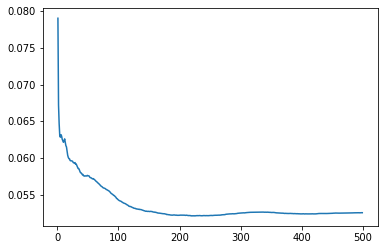

In [39]:
# calculate estimate of test error for a value of k
def get_cv_error(k):
  X = df_essay_all[:11176][["result.polarity", "result.type"]]
  y = df_essay_all[:11176]["pct"]
  
  # define pipeline
  ct = make_column_transformer(
      (OneHotEncoder(), ["result.type"]),
      remainder="passthrough",
  )

  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=k)
  ) 
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=X, y=y,
                             scoring="neg_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()
    
ks = pd.Series(range(1, 500))
ks.index = range(1, 500)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

In [40]:
# Create 10 Nearest Neighbors Model
X = df_essay_all[:11176][["result.polarity", "result.type"]]
y = df_essay_all[:11176]["pct"]

# Turn Categorical Variable into Quantatative
ct = make_column_transformer(
    (OneHotEncoder(), ["result.type"]),
    remainder="passthrough",
)

# define pipeline
pipeline_k = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5)
) 

# GridSearchCV will replace n_neighbors by values in param_grid.
grid_search = GridSearchCV(pipeline_k,
                          param_grid={"kneighborsregressor__n_neighbors": range(1, 300)},
                          scoring="neg_mean_squared_error",
                          cv=10)
grid_search.fit(X, y)
k = grid_search.best_params_["kneighborsregressor__n_neighbors"]
print(k)

# Fit Model
pipeline = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=10)
)

pipeline.fit(X, y)

# Create Predictions
df_essay_all["prediction_polarity"] = pipeline.predict(df_essay_all)
df_essay_all["diff_polarity"] = df_essay_all["prediction_polarity"] - df_essay_all["pct"]

219


In [41]:
df_essay_all.head(3)

,Unnamed: 0,essay_id,essay,rater1_domain1,rater2_domain1,domain1_score,avg_score,pct,essay_set,result.polarity,result.type,prediction_sparse,diff_sparse,prediction_polarity,diff_polarity
0,0.0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,4.0,0.666667,1,0.20,positive,0.783333,0.116667,0.675,0.008333
1,1.0,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,4.5,0.750000,1,0.17,positive,0.783333,0.033333,0.750,0.000000
2,2.0,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,3.5,0.583333,1,0.31,positive,0.833333,0.250000,0.550,-0.033333


-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

In [42]:
df_essay_all["diff_sparse"].mean()

0.2687665262475694

In [43]:
df_essay_all["diff_polarity"].mean()

0.2474820695614652

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

Final Model

In [60]:
df_essay_all["grade"] = df_essay_all["essay_set"].map({
    1 : 0,
    5 : 0,
    7 : 0,
    3 : 1,
    4 : 1,
    6 : 1,
    8 : 1
})

df_essay_all["type"] = df_essay_all["essay_set"].map({
    1 : 0,
    5 : 1,
    7 : 0,
    3 : 1,
    4 : 1,
    6 : 1,
    8 : 0
})

df_essay_all = df_essay_all.fillna(0)

Find best model

In [56]:
def get_cv_error(features):
  # Create 10 Nearest Neighbors Model
  X = df_essay_all[:11176][features]
  y = df_essay_all[:11176]["pct"]

  # Turn Categorical Variable into Quantatative
  ct = make_column_transformer(
      (OneHotEncoder(), ["result.type"]),
      remainder="passthrough",
  )

  # Fit Model
  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=10)
  )

  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=X, 
                             y=y,
                             scoring="neg_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

# calculate and store errors for different feature sets
errs = pd.Series()
for features in [["result.polarity", "result.type"],
                 ["result.polarity", "result.type", "grade"],
                 ["result.polarity", "result.type", "type"],
                 ["result.polarity", "result.type", "grade", "type"]]:
  errs[str(features)] = get_cv_error(features)

errs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


['result.polarity', 'result.type']                     0.062125
['result.polarity', 'result.type', 'grade']            0.052199
['result.polarity', 'result.type', 'type']             0.052742
['result.polarity', 'result.type', 'grade', 'type']    0.049623
dtype: float64

Use best model

In [62]:
# Create 10 Nearest Neighbors Model
X = df_essay_all[:11176][["result.polarity", "result.type", "grade", "type"]]
y = df_essay_all[:11176]["pct"]

# Turn Categorical Variable into Quantatative
ct = make_column_transformer(
    (OneHotEncoder(), ["result.type"]),
    remainder="passthrough",
)

# define pipeline
pipeline_k = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5)
) 

# GridSearchCV will replace n_neighbors by values in param_grid.
grid_search = GridSearchCV(pipeline_k,
                          param_grid={"kneighborsregressor__n_neighbors": range(1, 300)},
                          scoring="neg_mean_squared_error",
                          cv=10)
grid_search.fit(X, y)
k = grid_search.best_params_["kneighborsregressor__n_neighbors"]
print(k)

# Fit Model
pipeline = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=10)
)

pipeline.fit(X, y)

# Create Predictions
df_essay_all["prediction_final"] = pipeline.predict(df_essay_all)
df_essay_all["diff_final"] = df_essay_all["prediction_final"] - df_essay_all["pct"]

40


In [64]:
df_essay_all["diff_final"].mean()

0.1818930654568997